In [1]:
import numpy as np
import pandas as pd
import faiss
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
word2vec_df = pd.read_csv('word2vec.csv', header=None)
word2vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.128449,0.084878,0.340200,0.374050,0.031624,-0.073853,0.157624,0.080326,0.006026,0.042367,...,0.041799,-0.151517,0.084276,-0.261780,0.038419,0.165305,-0.133744,-0.242784,-0.093810,0.133526
1,0.216602,0.051986,0.343847,0.285206,0.454701,-0.149460,0.293772,0.364172,-0.286592,-0.197391,...,-0.304871,0.038930,0.033030,-0.136116,-0.064149,0.168915,-0.236246,-0.386564,-0.017884,-0.184059
2,0.655994,0.455050,-0.134669,-0.125196,-0.033283,-0.179871,-0.073417,-0.144653,0.095944,-0.237480,...,0.013808,-0.109779,0.237609,0.063632,0.128057,0.040554,0.136553,0.200578,-0.035860,0.346653
3,-0.120620,0.058960,0.394970,0.410903,0.294061,0.208330,0.587548,0.231434,0.061331,-0.294158,...,-0.299369,-0.166721,-0.128006,-0.493565,-0.032892,0.014108,-0.294551,-0.723810,0.220067,-0.178979
4,0.292108,0.259183,0.055939,0.277728,0.139238,-0.120943,-0.068696,0.287031,0.273742,-0.559118,...,-0.210177,-0.141721,0.035366,-0.156777,-0.173333,-0.052785,-0.102882,-0.301874,0.270945,-0.016915


In [3]:
# mean imputation
mean_vec = np.mean(word2vec_df.dropna(axis=0).values, axis=0)
word2vec_df.iloc[32618, :] = mean_vec
word2vec_df.iloc[87646, :] = mean_vec

# C-style contiguous
word2vec_arr = np.ascontiguousarray(word2vec_df.values.astype(np.float32))

# l2 normalization
faiss.normalize_L2(word2vec_arr)

In [4]:
def random_pairs(X, n_sample):
    # sample index pairs
    random_id = np.random.randint(low=0, high=len(X), size=(n_sample, 2))
    return random_id

def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

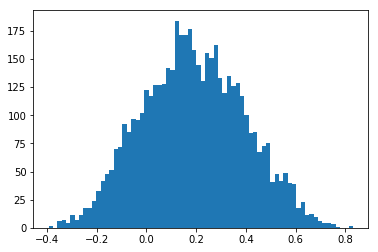

In [5]:
# similarity distribution
pairs = random_pairs(word2vec_arr, 5000)
sim_sample = [cosine_similarity(word2vec_arr[id1, :], word2vec_arr[id2, :]) for (id1, id2) in pairs]
plt.hist(sim_sample, bins=int(np.sqrt(len(sim_sample))))
plt.show()

In [6]:
index = faiss.IndexFlatIP(word2vec_arr.shape[1])
print(index.is_trained)
index.add(word2vec_arr)
print(index.ntotal)

True
99998


In [7]:
k = 20
xq = word2vec_arr
D, I = index.search(xq, k)

In [8]:
print(I[:5])
print('...')
print(I[-5:])

[[    0  5202 78502 86619 79835 36461 96522 57797 77635 85373 31452 13945
  81760 65944 38716 69484 94216 34066 34421 52949]
 [    1 90153 37370 91545 67287 71205 81992 78846 45745  2280 29454 26108
  76853 86903 60154 86618  1996 77932 88150 71163]
 [    2 49642 54671 41570 81357 67038  5933 90072 47072 96620 93744 92073
  82772 14575 26231 95581 51227 75240 15119 79499]
 [    3 50172 48522 48041 86246 77841 82179 65304 45670 58114  4635 11825
  89675 40039 49141  1092  1678 83647   789 60039]
 [    4 52694 20936 51846 13233 47950  1764 90564 94333 98314  2698 28479
  35053  3568 74107 45699 61210 44899 41974 13101]]
...
[[99993 49500 36529 89039 19237 46046 11887 78424 19602 52824 92956 26337
  34042 11240 46208 10686 74739 94090 58996 36516]
 [99994 25566 36625 89475 32502  8862 55020 99362 74422 56509 96825 82867
  11211  8335 98444 42493 14651 13082 21727 35082]
 [99995 87519 98862 66403 91301 67387 45117 71500 23717 83292 50045 53080
  45960 67487 39623 48865 36467 81118 68813 17

In [9]:
print(D[:5])
print('...')
print(D[-5:])

[[1.0000001  0.75925183 0.74120426 0.73283577 0.73219645 0.72933453
  0.7279152  0.7262937  0.723786   0.72022367 0.7184191  0.71785426
  0.7178144  0.7174257  0.7170432  0.7088493  0.70741343 0.70664954
  0.70581245 0.7053819 ]
 [0.99999994 0.81563306 0.81155694 0.80570924 0.80159116 0.80053157
  0.79992163 0.7999104  0.795028   0.79172504 0.7901298  0.7862498
  0.7835157  0.7827487  0.7812526  0.78125143 0.7809371  0.7806869
  0.78046966 0.77773553]
 [0.9999998  0.7484909  0.74679106 0.7303622  0.72683793 0.724295
  0.7192508  0.717329   0.71683955 0.7132478  0.7042551  0.7034449
  0.70004463 0.69875276 0.6985377  0.6928617  0.6913199  0.6898058
  0.6869942  0.6833352 ]
 [1.         0.8715801  0.85741055 0.8566249  0.8550012  0.8521298
  0.849394   0.8483807  0.8459638  0.8454931  0.8445532  0.8443638
  0.844055   0.8433057  0.84017825 0.8400432  0.8399848  0.8399296
  0.839837   0.837264  ]
 [1.         0.8001746  0.7918018  0.7859254  0.77156115 0.76829255
  0.76452315 0.76180816 0

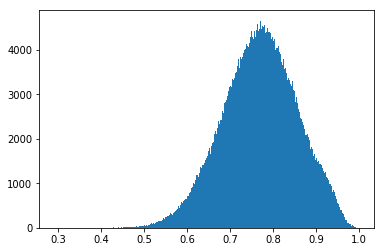

In [10]:
# filtered similarity distribution
plt.hist(D[:, 1:].ravel(), bins=int(np.sqrt(len(D[:, 1:].ravel()))))
plt.show()

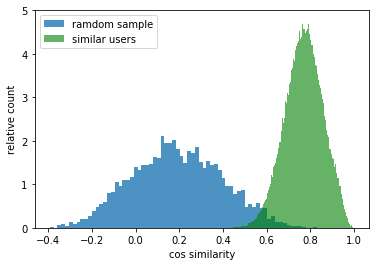

In [12]:
plt.hist(sim_sample, bins=int(np.sqrt(len(sim_sample))), density=True, \
         label='ramdom sample', alpha=0.8)
plt.hist(D[:, 1:].ravel(), bins=int(np.sqrt(len(D[:, 1:].ravel()))), density=True, \
         label='similar users', alpha=0.6, color='green')

plt.xlabel('cos similarity')
plt.ylabel('relative count')
plt.legend()
plt.show()

In [13]:
import pickle

pkl_file = open('words_list.pkl', 'rb')
words_list = pickle.load(pkl_file)
pkl_file.close()

In [14]:
from wordcloud import WordCloud

wc = []
# for who are similar to user_id = 9
for user_id in I[9]:
    wc.append(WordCloud(font_path='方正苏新诗柳楷简体.ttf', \
                        background_color='white', \
                        random_state=42, \
                        width=800, height=600).generate(' '.join(words_list[user_id])))

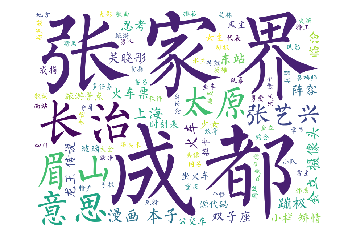

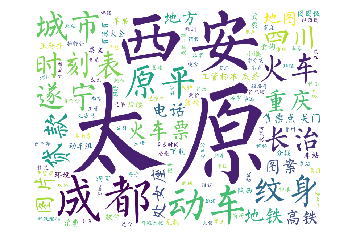

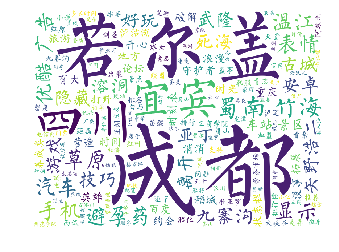

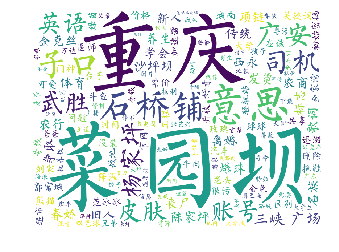

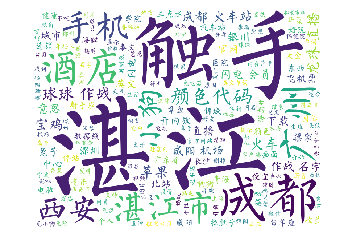

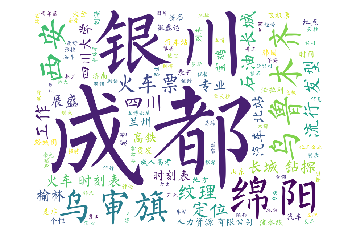

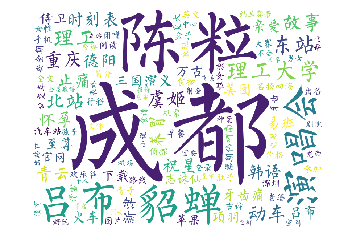

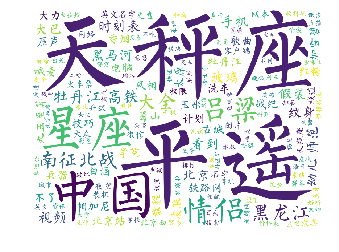

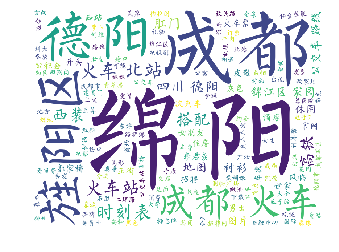

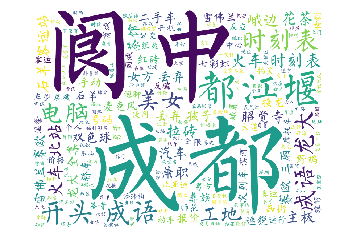

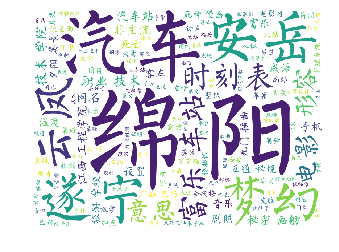

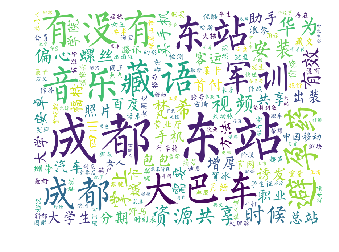

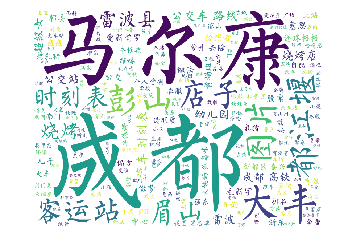

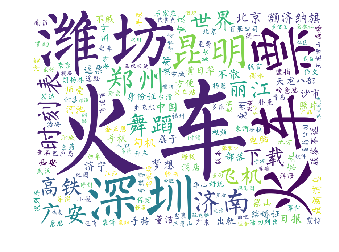

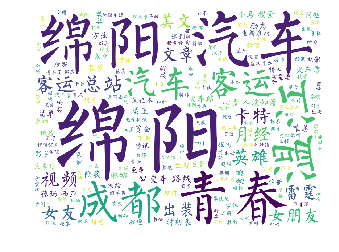

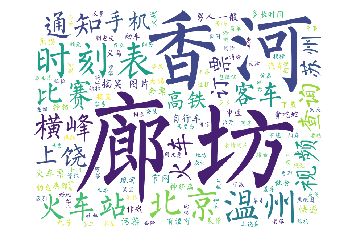

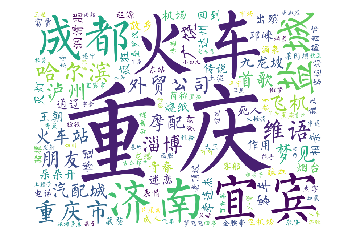

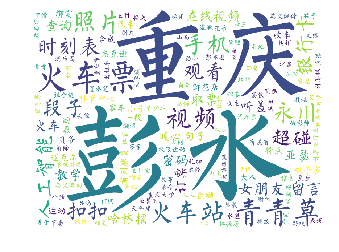

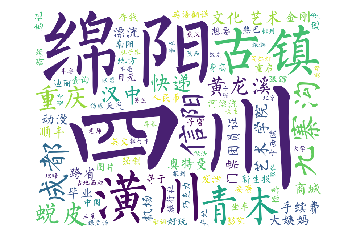

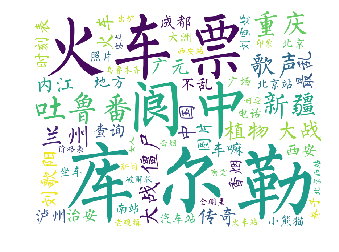

In [15]:
for ele in wc:
    plt.imshow(ele)
    plt.axis('off')
    plt.show()